Current working directory: /root/autodl-tmp
Missing values in target columns:
7d CS     621
28d CS    667
dtype: int64
Dataset shape after dropping rows with missing targets: (603, 73)
X shape: (603, 22)
y_7 shape: (603,)
y_28 shape: (603,)


/tmp/ipykernel_2249/2303923374.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
/tmp/ipykernel_2249/2303923374.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())


Summary statistics for scaled features:
                                 mean      std
SiO2                    -3.004783e-16  1.00083
Al2O3                   -2.356692e-17  1.00083
Fe2O3                    0.000000e+00  1.00083
CaO                      1.178346e-16  1.00083
MgO                     -1.060512e-16  1.00083
Na2O                     1.178346e-17  1.00083
K2O                     -2.121023e-16  1.00083
SO3                     -1.060512e-16  1.00083
TiO2                    -4.713385e-17  1.00083
P2O5                    -1.178346e-16  1.00083
SrO                      0.000000e+00  1.00083
Mn2O3                    2.356692e-17  1.00083
LOI                      3.535038e-17  1.00083
AL/B                     3.004783e-16  1.00083
SH/SS                   -4.713385e-17  1.00083
Ms                       4.713385e-16  1.00083
Ag/B                     2.651279e-16  1.00083
W/B                      1.001594e-16  1.00083
Sp/B                    -5.891731e-17  1.00083
Initial curing temp 

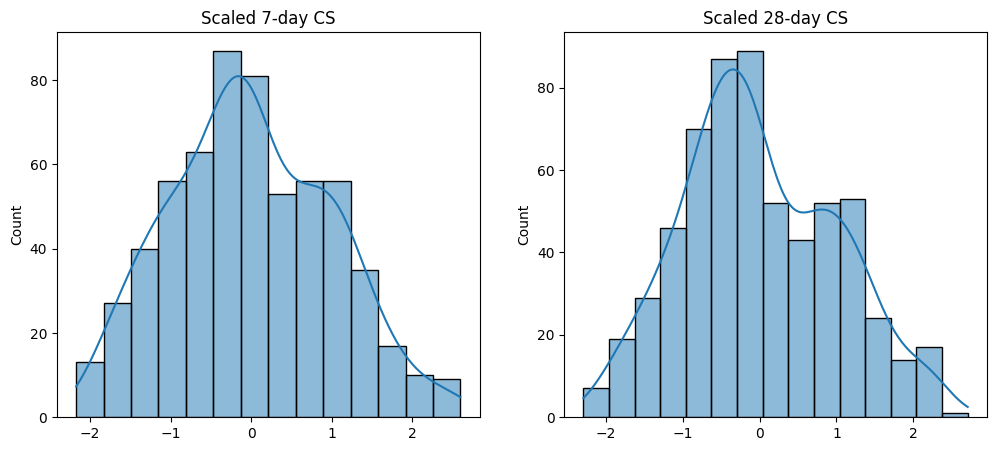

Dataset sizes:
Training: 482
Testing: 121
Using device: cuda


In [1]:
import pandas as pd
import numpy as np
import os

# Check current working directory (optional)
print("Current working directory:", os.getcwd())

# Read the CSV file
df = pd.read_csv(r'/root/autodl-tmp/clean AAC concrete dataset large ratio.csv')

# Remove the row where the "Ref." column equals "[107]"
df = df[df["Ref."] != "[107]"]

# Define original feature columns and target columns
original_feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

target_cols = ["7d CS", "28d CS"]

# Drop unwanted columns: "MnO", "Initial curing time (day)", "Initial curing rest time (day)"
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df = df.drop(columns=cols_to_drop)

# Update the feature columns list accordingly (remove dropped columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Convert target columns to numeric (replacing empty strings with NaN)
for col in target_cols:
    df[col] = pd.to_numeric(df[col].replace(' ', np.nan), errors='coerce')

# Print missing values in target columns
print("Missing values in target columns:")
print(df[target_cols].isnull().sum())

# Drop rows with missing target values
df_clean = df.dropna(subset=target_cols)
print(f"Dataset shape after dropping rows with missing targets: {df_clean.shape}")

# Fill missing values in specific feature columns using the median
df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())

# Extract feature and target arrays
X = df_clean[feature_cols].values
y_7 = df_clean["7d CS"].values
y_28 = df_clean["28d CS"].values

print("X shape:", X.shape)
print("y_7 shape:", y_7.shape)
print("y_28 shape:", y_28.shape)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Display summary statistics to check scaling
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
print("Summary statistics for scaled features:")
print(scaled_df.describe().loc[['mean', 'std']].T)


# Check missing values in the original DataFrame for feature and target columns
print("Missing values in original DataFrame:")
print(df[feature_cols + target_cols].isnull().sum())

# Check missing values in cleaned DataFrame
print("Missing values in cleaned DataFrame:")
print(df_clean[feature_cols + target_cols].isnull().sum())


import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets (assumes y_7 and y_28 are defined from your cleaned dataset)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Split the scaled targets into separate arrays
y_7_scaled = targets_scaled[:, 0]
y_28_scaled = targets_scaled[:, 1]

# Optional: Visualize the scaled target distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_7_scaled, kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(y_28_scaled, kde=True)
plt.title("Scaled 28-day CS")
plt.show()



import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy

# =============================================================================
# 0. Data Preparation (from your original code)
# =============================================================================
# Assume all the preprocessing has been done and we have:
# X_scaled, y_7_scaled, y_28_scaled, target_scaler, and feature names

# Split data (same as your original code)
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

X_test_clean = X_test
y7_test_clean = y7_test
y28_test_clean = y28_test

print("Dataset sizes:")
print(f"Training: {len(X_train_full)}")
print(f"Testing: {len(X_test_clean)}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =============================================================================
# 1. AGP Model Definition (from your original code)
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create datasets
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))




In [2]:
# SOLUTION 1: Global Scaler (treating all strength values as one distribution)
def solution1_global_scaler(X_scaled, y_7, y_28):
    # Combine all strength values
    all_strengths = np.concatenate([y_7, y_28])
    
    # Fit scaler on combined data
    global_scaler = StandardScaler()
    global_scaler.fit(all_strengths.reshape(-1, 1))
    
    # Scale using the same scaler
    y_7_scaled = global_scaler.transform(y_7.reshape(-1, 1)).flatten()
    y_28_scaled = global_scaler.transform(y_28.reshape(-1, 1)).flatten()
    
    return y_7_scaled, y_28_scaled, global_scaler


In [3]:
def solution2_normalize_by_max(y_7, y_28, max_strength=100.0):
    y_7_scaled = y_7 / max_strength
    y_28_scaled = y_28 / max_strength
    
    class MaxScaler:
        def __init__(self, max_val):
            self.max_val = max_val
        def inverse_transform(self, y):
            if y.ndim == 1:
                return y * self.max_val
            else:
                return y * self.max_val
    
    return y_7_scaled, y_28_scaled, MaxScaler(max_strength)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# Apply Global Scaler (Solution 1)
# =============================================================================
print("Applying global scaler to targets...")
y_7_scaled, y_28_scaled, target_scaler = solution1_global_scaler(X_scaled, y_7, y_28)

# Split data with scaled targets
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

X_test_clean = X_test
y7_test_clean = y7_test
y28_test_clean = y28_test

print("Dataset sizes:")
print(f"Training: {len(X_train_full)}")
print(f"Testing: {len(X_test_clean)}")

# =============================================================================
# XGBoost Model with Training Visualization
# =============================================================================

print("\n" + "="*80)
print("XGBOOST ANALYSIS WITH TRAINING VISUALIZATION")
print("="*80)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Split validation set for monitoring
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_train_full, y7_train_full, y28_train_full, test_size=0.15, random_state=42
)

# Define parameter grid
param_grid = {
    'n_estimators': [150, 250, 350],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Function to train with evaluation tracking
def train_xgboost_with_eval(X_train, y_train, X_val, y_val, params=None):
    """Train XGBoost with evaluation set tracking"""
    if params is None:
        params = {
            'n_estimators': 300,
            'max_depth': 6,
            'learning_rate': 0.1,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 0.1,
            'reg_alpha': 0.1,
            'reg_lambda': 1,
            'objective': 'reg:squarederror',
            'random_state': 42
        }
    
    model = xgb.XGBRegressor(**params)
    
    # Prepare evaluation set
    eval_set = [(X_train, y_train), (X_val, y_val)]
    
    # Train with evaluation
    model.fit(X_train, y_train,
              eval_set=eval_set,
              eval_metric=['rmse'],
              verbose=False)
    
    # Get evaluation results
    results = model.evals_result()
    
    return model, results

# =============================================================================
# 1. Grid Search for Best Parameters
# =============================================================================

print("\n--- Grid Search for Optimal Parameters ---")

# 7-day model grid search
xgb_model_7d = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
grid_search_7d = GridSearchCV(xgb_model_7d, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_7d.fit(X_train_full, y7_train_full)

print(f"\nBest parameters for 7-day CS: {grid_search_7d.best_params_}")
print(f"Best CV R² score: {grid_search_7d.best_score_:.4f}")

# 28-day model grid search
xgb_model_28d = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
grid_search_28d = GridSearchCV(xgb_model_28d, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_28d.fit(X_train_full, y28_train_full)

print(f"\nBest parameters for 28-day CS: {grid_search_28d.best_params_}")
print(f"Best CV R² score: {grid_search_28d.best_score_:.4f}")

# =============================================================================
# 2. Train Final Models with Evaluation Tracking
# =============================================================================

print("\n--- Training Final Models with Evaluation Tracking ---")

# Train 7-day model with best parameters
best_params_7d = grid_search_7d.best_params_
best_params_7d['n_estimators'] = 500  # Increase for evaluation tracking
best_params_7d['objective'] = 'reg:squarederror'
best_params_7d['random_state'] = 42

model_7d_final, results_7d = train_xgboost_with_eval(
    X_train, y7_train, X_val, y7_val, best_params_7d
)

# Train 28-day model with best parameters
best_params_28d = grid_search_28d.best_params_
best_params_28d['n_estimators'] = 500  # Increase for evaluation tracking
best_params_28d['objective'] = 'reg:squarederror'
best_params_28d['random_state'] = 42

model_28d_final, results_28d = train_xgboost_with_eval(
    X_train, y28_train, X_val, y28_val, best_params_28d
)

# =============================================================================
# 3. Training Progress Visualization
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 7-day training progress
ax = axes[0, 0]
epochs = len(results_7d['validation_0']['rmse'])
ax.plot(range(epochs), results_7d['validation_0']['rmse'], label='Train', color=colors[0], linewidth=2)
ax.plot(range(epochs), results_7d['validation_1']['rmse'], label='Validation', color=colors[1], linewidth=2)
ax.set_xlabel('Boosting Round', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('7-day CS: Training Progress', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 7-day zoomed view (last 100 epochs)
ax = axes[0, 1]
start_epoch = max(0, epochs - 100)
ax.plot(range(start_epoch, epochs), results_7d['validation_0']['rmse'][start_epoch:], 
        label='Train', color=colors[0], linewidth=2)
ax.plot(range(start_epoch, epochs), results_7d['validation_1']['rmse'][start_epoch:], 
        label='Validation', color=colors[1], linewidth=2)
ax.set_xlabel('Boosting Round', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('7-day CS: Training Progress (Last 100 Rounds)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 28-day training progress
ax = axes[1, 0]
epochs = len(results_28d['validation_0']['rmse'])
ax.plot(range(epochs), results_28d['validation_0']['rmse'], label='Train', color=colors[2], linewidth=2)
ax.plot(range(epochs), results_28d['validation_1']['rmse'], label='Validation', color=colors[3], linewidth=2)
ax.set_xlabel('Boosting Round', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('28-day CS: Training Progress', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 28-day zoomed view
ax = axes[1, 1]
start_epoch = max(0, epochs - 100)
ax.plot(range(start_epoch, epochs), results_28d['validation_0']['rmse'][start_epoch:], 
        label='Train', color=colors[2], linewidth=2)
ax.plot(range(start_epoch, epochs), results_28d['validation_1']['rmse'][start_epoch:], 
        label='Validation', color=colors[3], linewidth=2)
ax.set_xlabel('Boosting Round', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('28-day CS: Training Progress (Last 100 Rounds)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('XGBoost Training Progress - Overfitting Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# 4. Learning Curves
# =============================================================================

print("\n--- Generating Learning Curves ---")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 7-day learning curve
train_sizes, train_scores_7d, val_scores_7d = learning_curve(
    grid_search_7d.best_estimator_, X_train_full, y7_train_full, 
    cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

ax1.plot(train_sizes, np.mean(train_scores_7d, axis=1), 'o-', color=colors[0], 
         label='Training score', linewidth=2, markersize=8)
ax1.plot(train_sizes, np.mean(val_scores_7d, axis=1), 'o-', color=colors[1], 
         label='Cross-validation score', linewidth=2, markersize=8)
ax1.fill_between(train_sizes, 
                 np.mean(train_scores_7d, axis=1) - np.std(train_scores_7d, axis=1),
                 np.mean(train_scores_7d, axis=1) + np.std(train_scores_7d, axis=1), 
                 alpha=0.2, color=colors[0])
ax1.fill_between(train_sizes, 
                 np.mean(val_scores_7d, axis=1) - np.std(val_scores_7d, axis=1),
                 np.mean(val_scores_7d, axis=1) + np.std(val_scores_7d, axis=1), 
                 alpha=0.2, color=colors[1])
ax1.set_xlabel('Training Set Size', fontsize=12)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Learning Curve - 7-day CS', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# 28-day learning curve
train_sizes, train_scores_28d, val_scores_28d = learning_curve(
    grid_search_28d.best_estimator_, X_train_full, y28_train_full, 
    cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

ax2.plot(train_sizes, np.mean(train_scores_28d, axis=1), 'o-', color=colors[2], 
         label='Training score', linewidth=2, markersize=8)
ax2.plot(train_sizes, np.mean(val_scores_28d, axis=1), 'o-', color=colors[3], 
         label='Cross-validation score', linewidth=2, markersize=8)
ax2.fill_between(train_sizes, 
                 np.mean(train_scores_28d, axis=1) - np.std(train_scores_28d, axis=1),
                 np.mean(train_scores_28d, axis=1) + np.std(train_scores_28d, axis=1), 
                 alpha=0.2, color=colors[2])
ax2.fill_between(train_sizes, 
                 np.mean(val_scores_28d, axis=1) - np.std(val_scores_28d, axis=1),
                 np.mean(val_scores_28d, axis=1) + np.std(val_scores_28d, axis=1), 
                 alpha=0.2, color=colors[3])
ax2.set_xlabel('Training Set Size', fontsize=12)
ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_title('Learning Curve - 28-day CS', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.suptitle('Learning Curves - Sample Size Impact', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# 5. Test Set Performance
# =============================================================================

print("\n--- Test Set Performance ---")

# Make predictions
y_pred_7d_scaled = grid_search_7d.best_estimator_.predict(X_test_clean)
y_pred_28d_scaled = grid_search_28d.best_estimator_.predict(X_test_clean)

# Convert to original scale using global scaler
y_pred_7d = target_scaler.inverse_transform(y_pred_7d_scaled.reshape(-1, 1)).flatten()
y_pred_28d = target_scaler.inverse_transform(y_pred_28d_scaled.reshape(-1, 1)).flatten()

# Ground truth
y_true_7d = target_scaler.inverse_transform(y7_test_clean.reshape(-1, 1)).flatten()
y_true_28d = target_scaler.inverse_transform(y28_test_clean.reshape(-1, 1)).flatten()

# Calculate metrics
r2_7d = r2_score(y_true_7d, y_pred_7d)
r2_28d = r2_score(y_true_28d, y_pred_28d)
rmse_7d = np.sqrt(mean_squared_error(y_true_7d, y_pred_7d))
rmse_28d = np.sqrt(mean_squared_error(y_true_28d, y_pred_28d))
mae_7d = mean_absolute_error(y_true_7d, y_pred_7d)
mae_28d = mean_absolute_error(y_true_28d, y_pred_28d)

print(f"\nTest Set Performance:")
print(f"7-day CS:  R² = {r2_7d:.4f}, RMSE = {rmse_7d:.4f}, MAE = {mae_7d:.4f}")
print(f"28-day CS: R² = {r2_28d:.4f}, RMSE = {rmse_28d:.4f}, MAE = {mae_28d:.4f}")

# =============================================================================
# 6. Feature Importance Analysis
# =============================================================================

print("\n--- Feature Importance Analysis ---")

# Get feature importance
importance_7d = grid_search_7d.best_estimator_.feature_importances_
importance_28d = grid_search_28d.best_estimator_.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    '7-day Importance': importance_7d,
    '28-day Importance': importance_28d
})
feature_importance_df['Average Importance'] = (
    feature_importance_df['7-day Importance'] + 
    feature_importance_df['28-day Importance']
) / 2
feature_importance_df = feature_importance_df.sort_values('Average Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10).to_string(index=False))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 7-day importance
top_features_7d = feature_importance_df.nlargest(15, '7-day Importance')
ax1.barh(top_features_7d['Feature'], top_features_7d['7-day Importance'], 
         color=colors[0], alpha=0.8)
ax1.set_xlabel('Importance Score', fontsize=12)
ax1.set_title('Feature Importance - 7-day CS', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# 28-day importance
top_features_28d = feature_importance_df.nlargest(15, '28-day Importance')
ax2.barh(top_features_28d['Feature'], top_features_28d['28-day Importance'], 
         color=colors[1], alpha=0.8)
ax2.set_xlabel('Importance Score', fontsize=12)
ax2.set_title('Feature Importance - 28-day CS', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.suptitle('XGBoost Feature Importance Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# 7. Prediction vs Actual Plots
# =============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 7-day predictions
ax1.scatter(y_true_7d, y_pred_7d, alpha=0.6, color=colors[0])
ax1.plot([y_true_7d.min(), y_true_7d.max()], 
         [y_true_7d.min(), y_true_7d.max()], 
         'k--', linewidth=2, label='Perfect prediction')
ax1.set_xlabel('True 7-day CS (MPa)', fontsize=12)
ax1.set_ylabel('Predicted 7-day CS (MPa)', fontsize=12)
ax1.set_title(f'7-day CS Predictions (R² = {r2_7d:.3f})', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 28-day predictions
ax2.scatter(y_true_28d, y_pred_28d, alpha=0.6, color=colors[1])
ax2.plot([y_true_28d.min(), y_true_28d.max()], 
         [y_true_28d.min(), y_true_28d.max()], 
         'k--', linewidth=2, label='Perfect prediction')
ax2.set_xlabel('True 28-day CS (MPa)', fontsize=12)
ax2.set_ylabel('Predicted 28-day CS (MPa)', fontsize=12)
ax2.set_title(f'28-day CS Predictions (R² = {r2_28d:.3f})', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('XGBoost Model Predictions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# 8. Residual Analysis
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 7-day residuals
residuals_7d = y_true_7d - y_pred_7d
ax = axes[0, 0]
ax.scatter(y_pred_7d, residuals_7d, alpha=0.6, color=colors[0])
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted 7-day CS (MPa)', fontsize=12)
ax.set_ylabel('Residuals (MPa)', fontsize=12)
ax.set_title('7-day CS Residuals', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 7-day residual distribution
ax = axes[0, 1]
ax.hist(residuals_7d, bins=30, alpha=0.7, color=colors[0], edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Residuals (MPa)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title(f'7-day Residual Distribution (std={np.std(residuals_7d):.2f})', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 28-day residuals
residuals_28d = y_true_28d - y_pred_28d
ax = axes[1, 0]
ax.scatter(y_pred_28d, residuals_28d, alpha=0.6, color=colors[1])
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted 28-day CS (MPa)', fontsize=12)
ax.set_ylabel('Residuals (MPa)', fontsize=12)
ax.set_title('28-day CS Residuals', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 28-day residual distribution
ax = axes[1, 1]
ax.hist(residuals_28d, bins=30, alpha=0.7, color=colors[1], edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Residuals (MPa)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title(f'28-day Residual Distribution (std={np.std(residuals_28d):.2f})', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.suptitle('Residual Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# 9. Overfitting Summary
# =============================================================================

print("\n" + "="*80)
print("OVERFITTING ANALYSIS SUMMARY")
print("="*80)

# Calculate train performance
y_pred_7d_train_scaled = grid_search_7d.best_estimator_.predict(X_train_full)
y_pred_28d_train_scaled = grid_search_28d.best_estimator_.predict(X_train_full)

r2_7d_train = r2_score(y7_train_full, y_pred_7d_train_scaled)
r2_28d_train = r2_score(y28_train_full, y_pred_28d_train_scaled)

print(f"\n7-day CS Model:")
print(f"  Training R²: {r2_7d_train:.4f}")
print(f"  Test R²:     {r2_7d:.4f}")
print(f"  Difference:  {r2_7d_train - r2_7d:.4f}")
print(f"  Status:      {'Overfitting' if r2_7d_train - r2_7d > 0.05 else 'Good generalization'}")

print(f"\n28-day CS Model:")
print(f"  Training R²: {r2_28d_train:.4f}")
print(f"  Test R²:     {r2_28d:.4f}")
print(f"  Difference:  {r2_28d_train - r2_28d:.4f}")
print(f"  Status:      {'Overfitting' if r2_28d_train - r2_28d > 0.05 else 'Good generalization'}")

# Final overfitting metrics
final_train_rmse_7d = results_7d['validation_0']['rmse'][-1]
final_val_rmse_7d = results_7d['validation_1']['rmse'][-1]
final_train_rmse_28d = results_28d['validation_0']['rmse'][-1]
final_val_rmse_28d = results_28d['validation_1']['rmse'][-1]

print(f"\nFinal Training Metrics (Scaled):")
print(f"7-day CS:  Train RMSE = {final_train_rmse_7d:.4f}, Val RMSE = {final_val_rmse_7d:.4f}")
print(f"28-day CS: Train RMSE = {final_train_rmse_28d:.4f}, Val RMSE = {final_val_rmse_28d:.4f}")

# Validation curve for max_depth parameter
print("\n--- Validation Curves for Key Parameters ---")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Validation curve for max_depth (7-day)
param_range = [3, 4, 5, 6, 7, 8, 9, 10]
train_scores, val_scores = validation_curve(
    xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    X_train_full, y7_train_full, param_name="max_depth", param_range=param_range,
    cv=5, scoring="r2"
)

ax1.plot(param_range, np.mean(train_scores, axis=1), 'o-', color=colors[0], 
         label="Training score", linewidth=2, markersize=8)
ax1.plot(param_range, np.mean(val_scores, axis=1), 'o-', color=colors[1], 
         label="Cross-validation score", linewidth=2, markersize=8)
ax1.fill_between(param_range, 
                 np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                 alpha=0.2, color=colors[0])
ax1.fill_between(param_range, 
                 np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                 np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                 alpha=0.2, color=colors[1])
ax1.set_xlabel('Max Depth', fontsize=12)
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Validation Curve - 7-day CS (Max Depth)', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Validation curve for max_depth (28-day)
train_scores, val_scores = validation_curve(
    xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    X_train_full, y28_train_full, param_name="max_depth", param_range=param_range,
    cv=5, scoring="r2"
)

ax2.plot(param_range, np.mean(train_scores, axis=1), 'o-', color=colors[2], 
         label="Training score", linewidth=2, markersize=8)
ax2.plot(param_range, np.mean(val_scores, axis=1), 'o-', color=colors[3], 
         label="Cross-validation score", linewidth=2, markersize=8)
ax2.fill_between(param_range, 
                 np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                 alpha=0.2, color=colors[2])
ax2.fill_between(param_range, 
                 np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                 np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                 alpha=0.2, color=colors[3])
ax2.set_xlabel('Max Depth', fontsize=12)
ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_title('Validation Curve - 28-day CS (Max Depth)', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.suptitle('Validation Curves - Parameter Sensitivity', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Applying global scaler to targets...
Dataset sizes:
Training: 482
Testing: 121

XGBOOST ANALYSIS WITH TRAINING VISUALIZATION

--- Grid Search for Optimal Parameters ---
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
